# Stats - frequency and intensity, annual

$$
z_{frequency} = \frac{z_{f}}{z_{f_{hist}}}, \quad
z_{f} = \displaystyle\sum_{y=1}^{30} \left(
\begin{cases}
0 & \quad (\bar{x}_y - P_{10_{hist}}) \geq 0 \\
1 & \quad (\bar{x}_y - P_{10_{hist}}) < 0
\end{cases} \right)
$$

$$
z_{intensity} =
\frac{1}{30} \displaystyle\sum_{y=1}^{30} \left(
\begin{cases}
0 & \quad (\bar{x}_y - P_{10_{hist}}) \geq 0 \\
-\frac{\bar{x}_y - P_{10_{hist}}}{\sigma_{hist}} & \quad (\bar{x}_y - P_{10_{hist}}) < 0
\end{cases} \right)
$$

- calculate annual means (or seasonal means for each year)
- calculate the historical 10th percentile and standard deviation from the annual means
- calculate frequency and severity
- ensemble reduction

In [1]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns

In [2]:
def plot_heatmap(dataset, model=0, rlat=15, rlon=15):
    for v in list(dataset.data_vars):
        dataset_df = (
            dataset.isel(model=model, rlat=rlat, rlon=rlon)[v]
            .to_dataframe()[[v]]
            .dropna()
            .reset_index()
            .pivot(index="exp", columns="year", values=v)
        )
        plt.figure(figsize=(15, 5))
        sns.heatmap(dataset_df, xticklabels=True, cmap="RdPu")
        plt.title(v)
        plt.tight_layout()
        plt.show()

In [15]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [3]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [16]:
_, ds_ec_freq, ds_ec_int = cplt.calc_event_frequency_intensity(
    ds_ec, skipna=True
)

In [7]:
ds_ec_freq_reduced = ds_ec_freq.mean(dim="model", skipna=True)
# ds_ec_freq_reduced = ds_ec_freq.mean(dim="year", skipna=True).mean(dim="model", skipna=True)

In [56]:
# cplt.plot_stats(ds_ec_freq_reduced, cplt.projection_eurocordex, cmap="magma_r", levels=sorted([x / x**2 for x in np.arange(2, 9)] + list(np.arange(1, 9))))

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


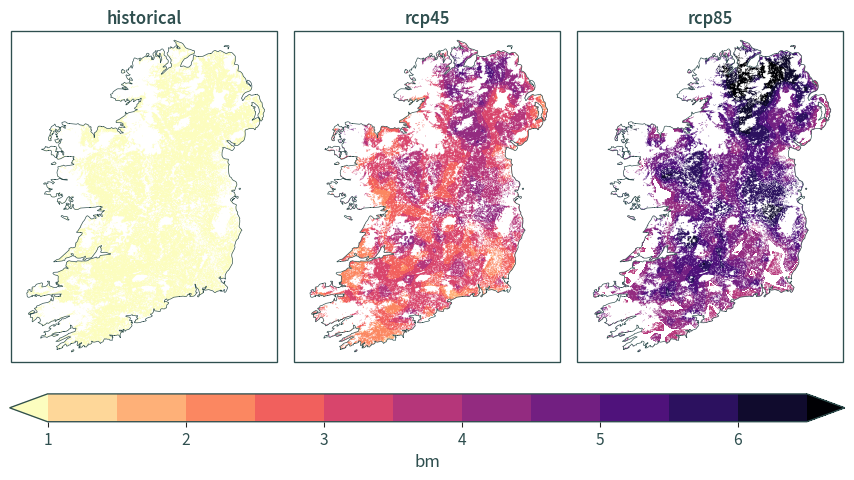

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


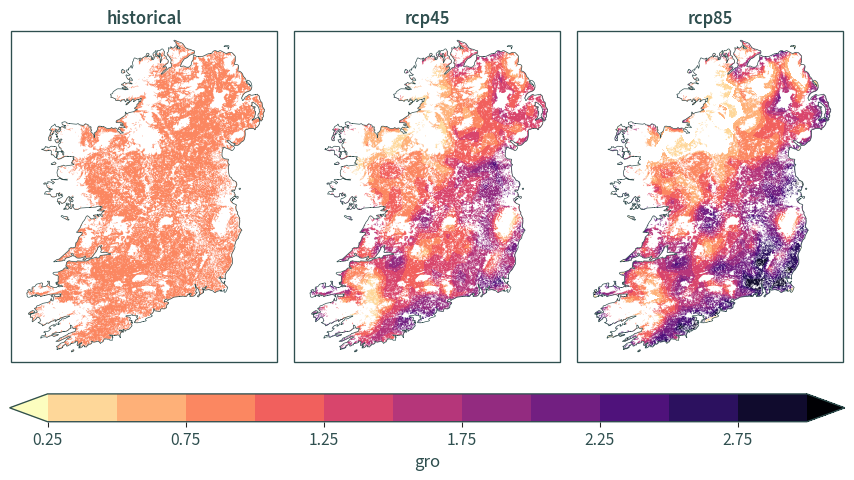

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


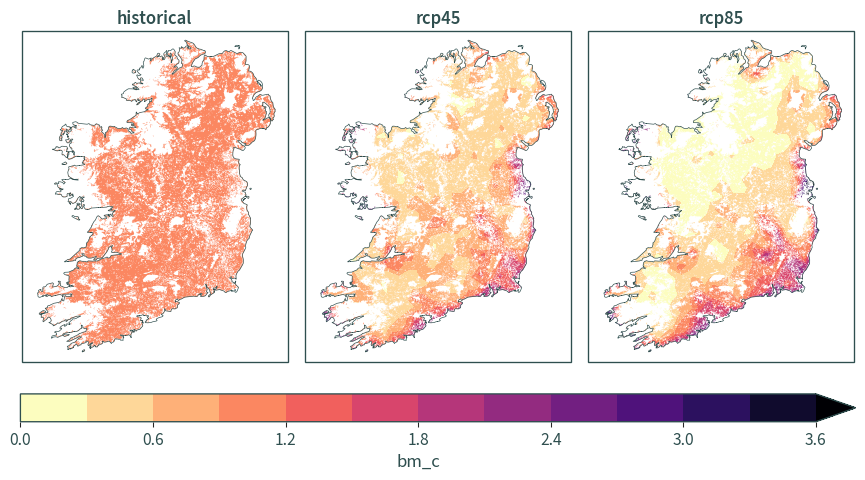

In [8]:
cplt.plot_stats(ds_ec_freq_reduced, cplt.projection_eurocordex, cmap="magma_r")

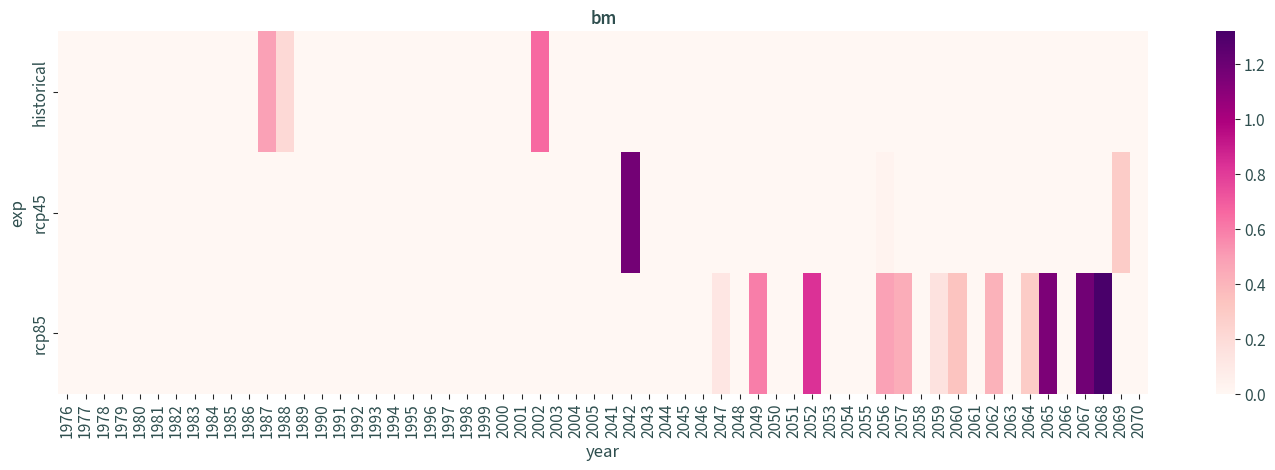

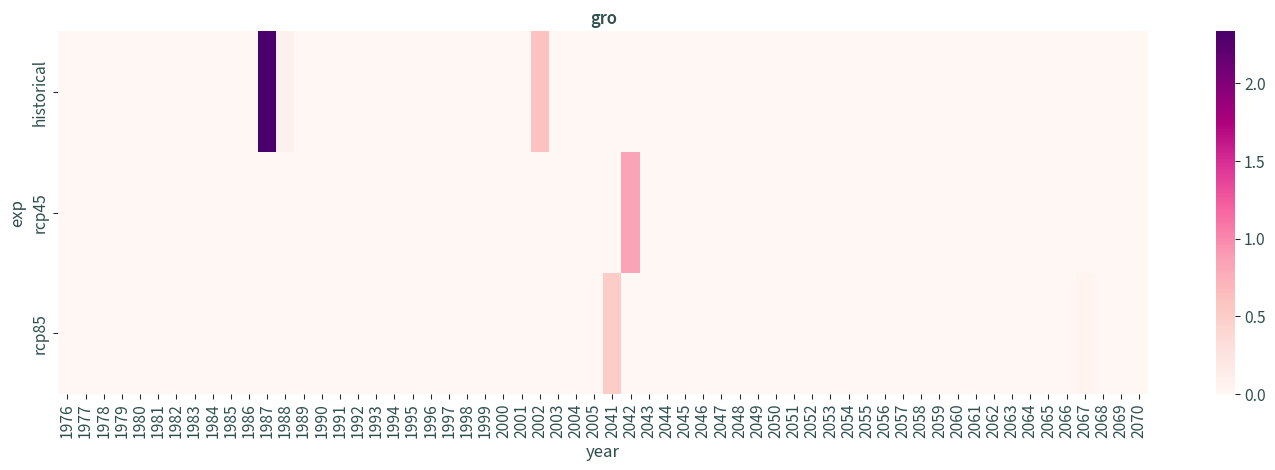

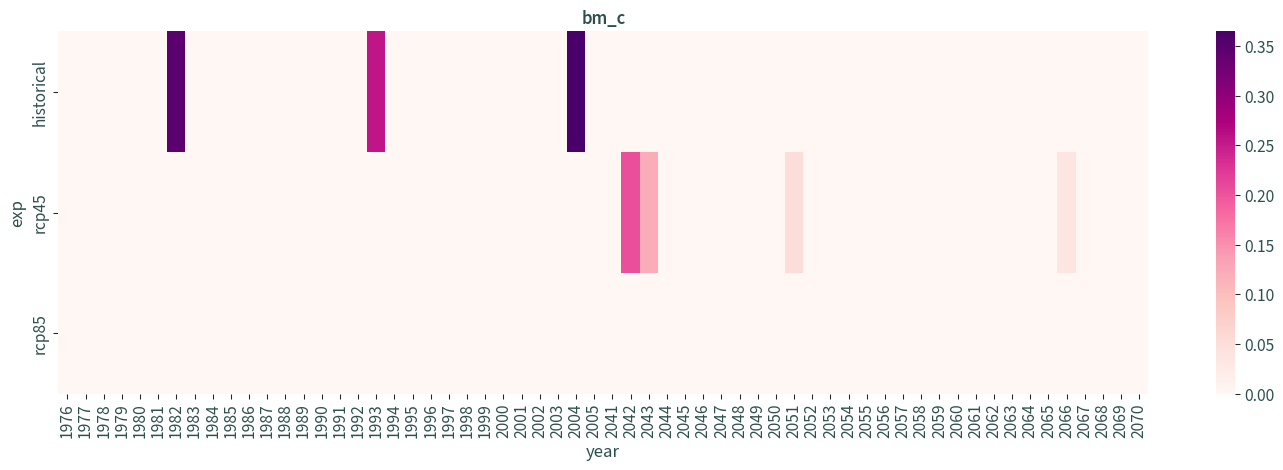

In [24]:
plot_heatmap(ds_ec_int)

In [25]:
ds_ec_int_reduced = ds_ec_int.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

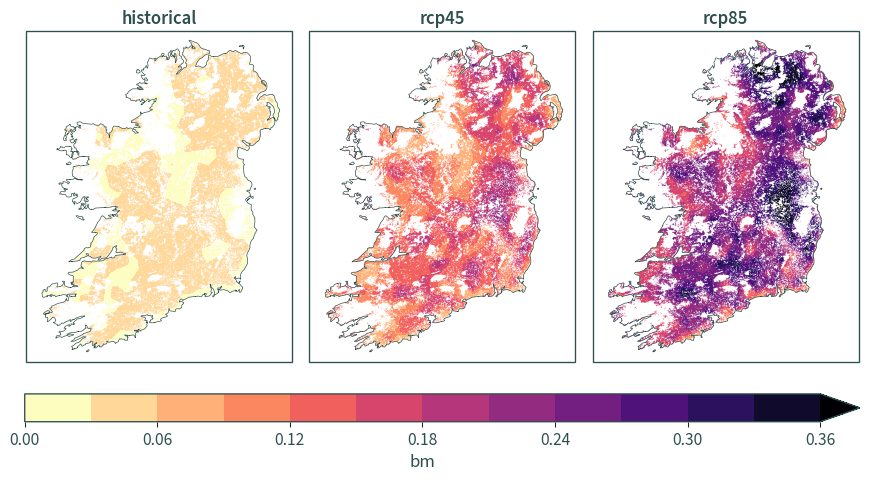

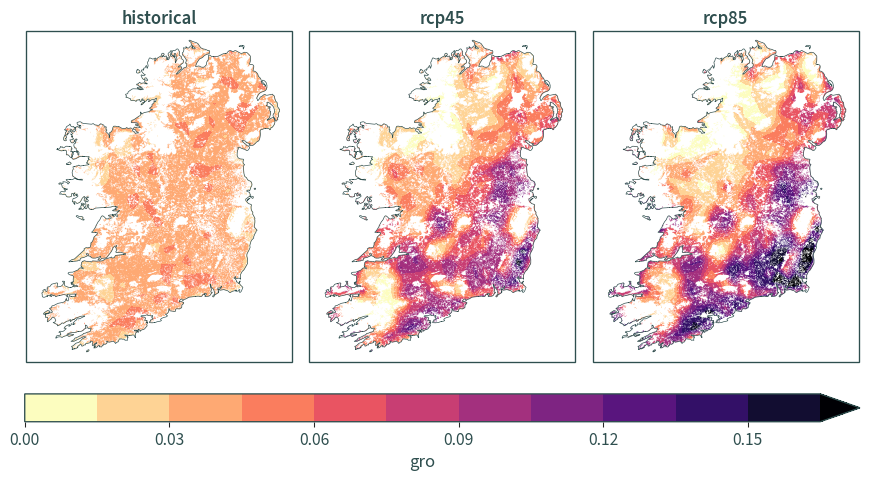

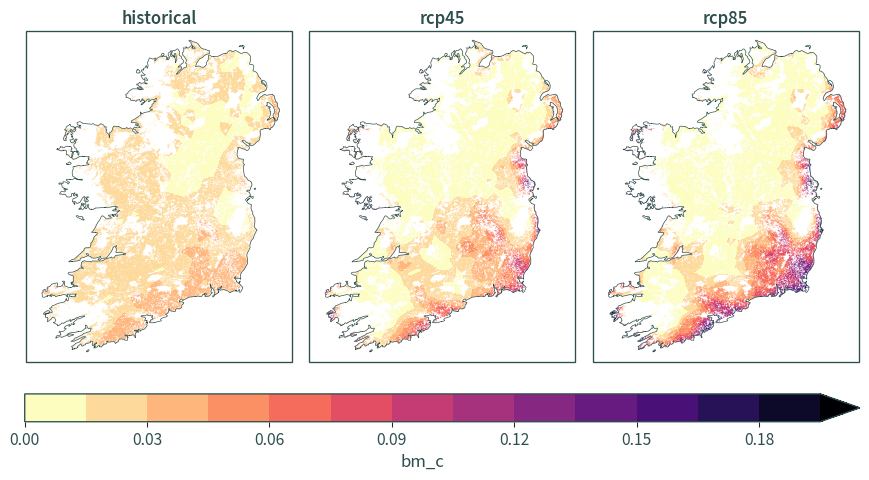

In [29]:
cplt.plot_stats(ds_ec_int_reduced, cplt.projection_eurocordex, cmap="magma_r")

## HiResIreland

In [3]:
ds_hr = cplt.load_all_data("HiResIreland")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [4]:
_, ds_hr_freq, ds_hr_int = cplt.calc_event_frequency_intensity(
    ds_hr, skipna=True
)

In [5]:
ds_hr_freq_reduced = ds_hr_freq.mean(dim="model", skipna=True)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


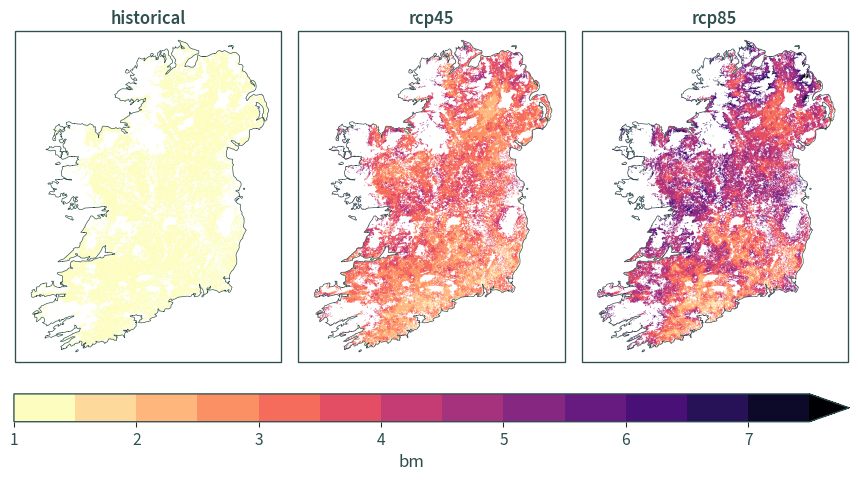

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


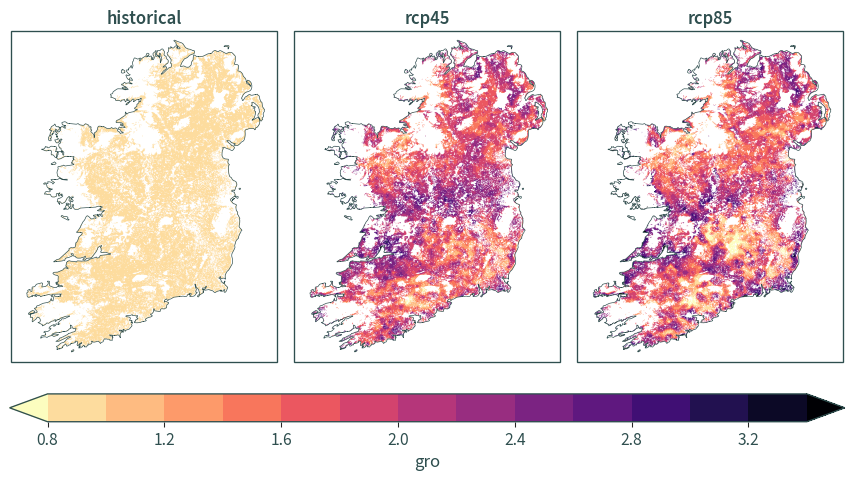

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


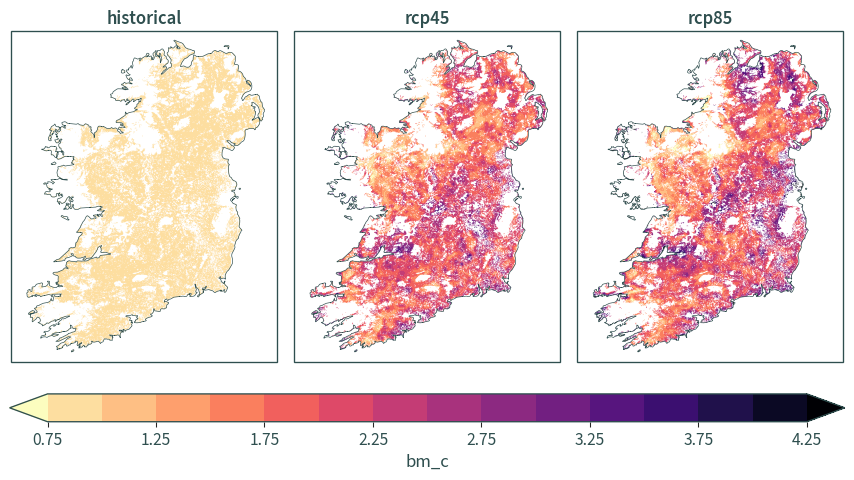

In [6]:
cplt.plot_stats(
    ds_hr_freq_reduced, cplt.projection_hiresireland, cmap="magma_r"
)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy

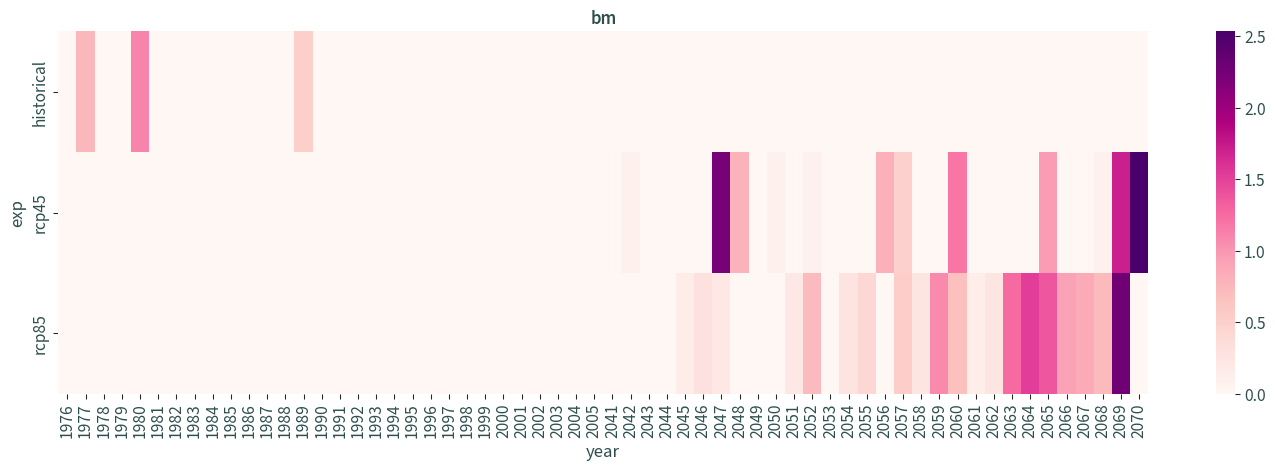

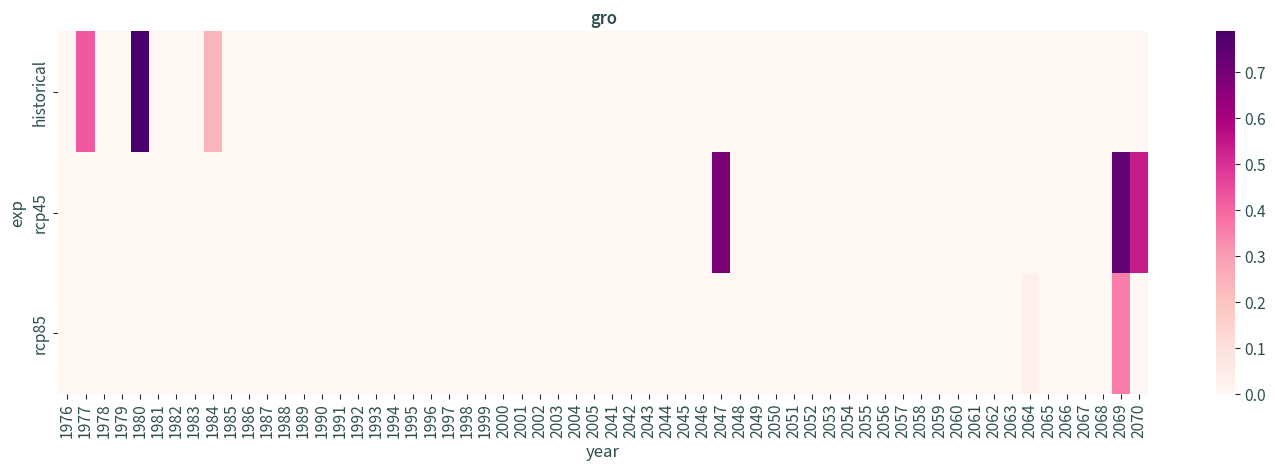

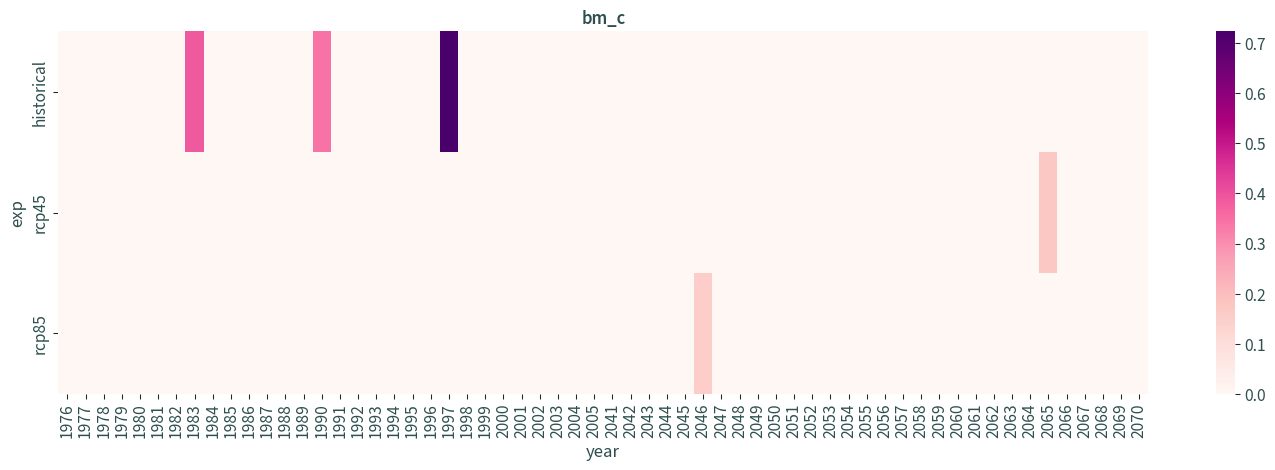

In [7]:
plot_heatmap(ds_hr_int)

In [8]:
ds_hr_int_reduced = ds_hr_int.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

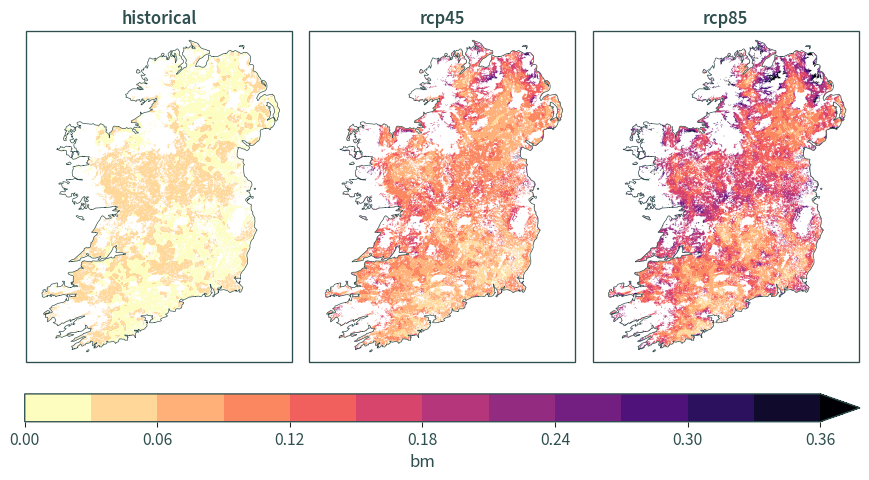

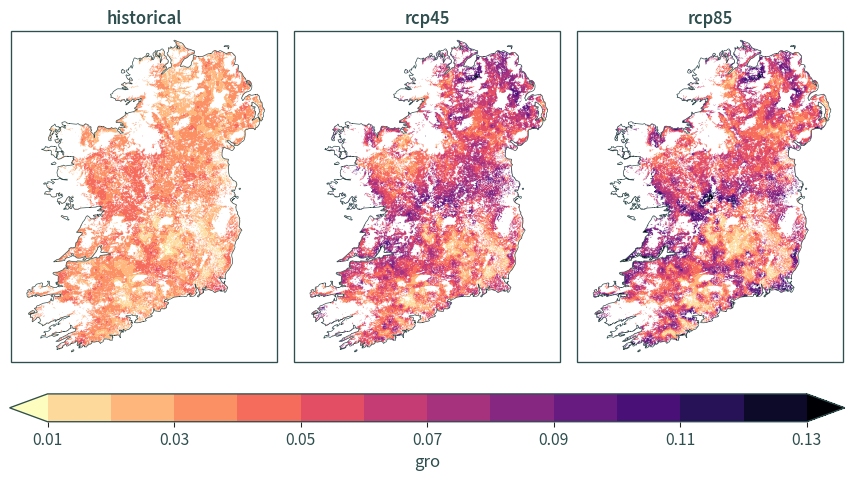

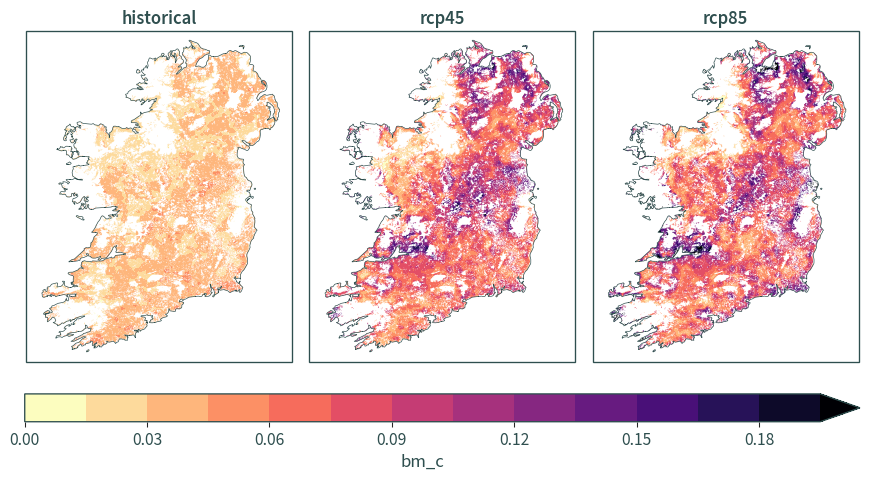

In [9]:
cplt.plot_stats(
    ds_hr_int_reduced, cplt.projection_hiresireland, cmap="magma_r"
)